# In this project I continue to use 20 news group data to do K-means clustering. With labels available I can evaluate the clustering result with homogneity and completeness 

# Build TF-IDF Matrix

In [15]:
# import data and libraries
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn.datasets import fetch_20newsgroups

from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline
import matplotlib.colors as colors
import matplotlib as mpl
mpl.use('pgf')

categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics',
              'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,
shuffle=True, random_state=42)

print(dataset.target[0:100])
print(dataset.target_names)

from sklearn.feature_extraction.text import TfidfVectorizer
min_df = 3
vectorizer = TfidfVectorizer(min_df=min_df, stop_words='english')
dataset_tfidf= vectorizer.fit_transform(dataset.data)
print('document matrix dimension is', dataset_tfidf.shape)

feature_names = np.asarray(vectorizer.get_feature_names())
print (feature_names[12000:12020])


/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


[2 1 2 3 6 5 2 6 2 5 2 7 3 5 6 1 6 1 6 4 6 5 6 2 6 3 7 5 1 1 6 2 3 4 3 3 3
 0 6 0 5 3 4 2 6 6 5 6 4 1 0 2 5 7 0 5 7 7 3 4 4 5 1 7 7 1 3 1 0 6 0 7 1 5
 3 1 5 7 1 4 6 1 1 5 2 6 2 5 1 0 5 0 4 0 3 4 3 2 6 7]
['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
document matrix dimension is (7882, 27768)
['geosphere' 'ger' 'gerald' 'geraldo' 'gerardis' 'gerhard' 'gerhards'
 'germain' 'german' 'germans' 'germany' 'geronimo' 'gerrit' 'gerry'
 'gervin' 'gestalt' 'gesture' 'gets' 'getter' 'getting']


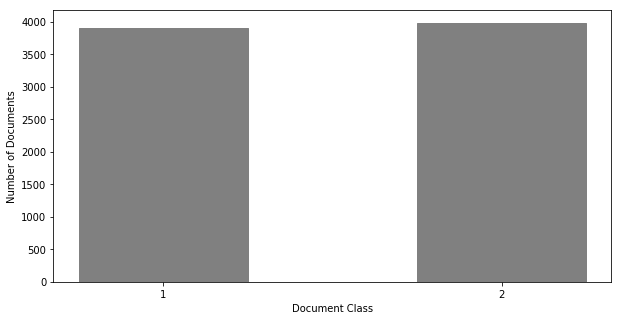

In [10]:
two_class_target = [0 if t<4 else 1 for t in dataset.target]
from collections import Counter
c = Counter(two_class_target)
bar_heights = [c[i] for i in range(2)]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

x = range(1,3)
bars = ax.bar(x, bar_heights, width = 0.5, color='0.5', edgecolor='0.5')

ax.set_xticks([i for i in x])

ax.set_xlabel("Document Class")
ax.set_ylabel("Number of Documents")


# Apply Kmeans to TF-IDF data

In [ ]:
# do the actual clustering
from sklearn.cluster import KMeans

labels = dataset.target              # get the ground truth labels
#true_k = np.unique(labels).shape[0]  # get number of categories
km=KMeans(n_clusters=2, init='k-means++', random_state=0, max_iter=2000, n_init=30)
km.fit(dataset_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=2, n_init=30, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

[[ 361 3542]
 [3873  106]]


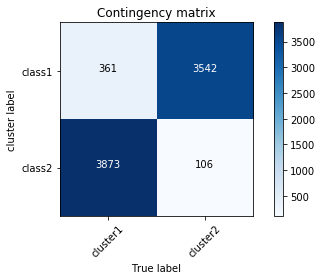

end


In [38]:
import itertools
#define function to plot contingency table
def plot_contingency_matrix(cm,
                            classname =['class1','class2'],
                            clustername=['cluster1','cluster2'],
                            title='Contingency matrix',
                            cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.gcf().clear()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classname))
    plt.xticks(tick_marks, clustername, rotation=45)
    plt.yticks(tick_marks, classname)

   
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('True label')
    plt.ylabel('cluster label')
    plt.tight_layout()
    plt.show()
    print('end')

# contingency matrix calculation and plotting
two_class_target = [0 if t<4 else 1 for t in dataset.target]   # group the 8 cateogries into two

contin_matrix = metrics.cluster.contingency_matrix(two_class_target, km.labels_)  #row is true, cloumn is predicted
print(contin_matrix)
plot_contingency_matrix(contin_matrix)


In [19]:
def km_measures(dataset,target_label,n_cluster=2):
    km = KMeans(n_clusters=n_cluster,random_state=0,max_iter=2000,n_init=30)
    km.fit(dataset)
   
    homogeneity = metrics.homogeneity_score(target_label, km.labels_)
    completeness = metrics.completeness_score(target_label, km.labels_)
    v_measure = metrics.v_measure_score(target_label, km.labels_)
    adjusted_rand_index = metrics.adjusted_rand_score(target_label, km.labels_)
    adjusted_mutual_info = metrics.adjusted_mutual_info_score(target_label, km.labels_)
    five_measures = {
        "homogeneity": homogeneity,
        "completeness": completeness,
        "v_measure": v_measure,
        "adjusted_rand_index": adjusted_rand_index,
        "adjusted_mutual_info": adjusted_mutual_info}
    return five_measures

In [18]:
print(km_measures(dataset_tfidf,two_class_target))

{'homogeneity': 0.25359589289260431, 'completeness': 0.33481574882437298, 'v_measure': 0.28860033608397917, 'adjusted_rand_index': 0.18076179588914554, 'adjusted_mutual_info': 0.25352755133060884}


# Dimensionality Reduction

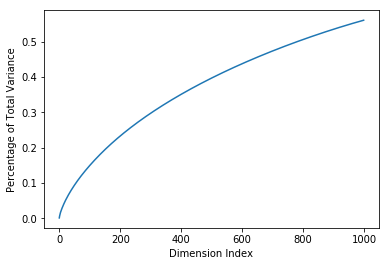

In [20]:
# Question 4
from sklearn.decomposition import TruncatedSVD
# construct dataset
svd =  TruncatedSVD(n_components = 1000)
dataset_svd = svd.fit_transform(dataset_tfidf)
# plot
plt.gcf().clear()
plt.plot(np.cumsum(svd.explained_variance_ratio_[:1000]))
plt.xlabel("Dimension Index")
plt.ylabel("Percentage of Total Variance")
plt.show()   

In [18]:
# Question 5 - SVD
svd_homo = []
svd_comp = []
svd_v = []
svd_ami = []
svd_ari = []

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print("r =", r)
    svd =  TruncatedSVD(n_components = r)
    dataset_svd = svd.fit_transform(dataset_tfidf)
    kmm= km_measures(dataset_svd,two_class_target)
    svd_homo.append(kmm['homogeneity'])
    svd_comp.append(kmm['completeness'])
    svd_v.append(kmm['v_measure'])
    svd_ami.append(kmm['adjusted_mutual_info'])
    svd_ari.append(kmm['adjusted_rand_index'])
    
print("svd_homo:", svd_homo)
print("svd_comp:", svd_comp)
print("svd_v:", svd_v)
print("svd_ami:", svd_ami)
print("svd_ari:", svd_ari)


svd_homo: [0.00029275270509964866, 0.59637720279208628, 0.44009520697411231, 0.21943096056810088, 0.23302813174713369, 0.23355999485418594, 0.2369385307723762, 0.24446935605095971, 0.24667732085652974]
svd_comp: [0.00029712211872139202, 0.59738183631065089, 0.46909618840355616, 0.30824799393746144, 0.32001654816583236, 0.32041694018763073, 0.32296062105486495, 0.3286330342406158, 0.32958218933849998]
svd_v: [0.00029492122900643043, 0.5968790968159281, 0.45413316750643978, 0.2563647946364111, 0.26968113447537817, 0.27017940339255475, 0.27334142157688041, 0.28037121330798026, 0.28216610755989191]
svd_ami: [0.00020122874418420039, 0.59634025098989507, 0.44004394633197413, 0.21935948849611323, 0.23295790554551601, 0.23348981738989588, 0.23686866289502842, 0.24440017821638979, 0.24660834540445511]
svd_ari: [0.00032816075886814641, 0.69814685176284752, 0.45584016912144404, 0.14265217349952611, 0.15598914892164775, 0.15659125979038677, 0.16043154642841317, 0.16908558537155544, 0.1726529842202

In [ ]:
from sklearn.decomposition import NMF
nmf_homo = []
nmf_comp = []
nmf_v = []
nmf_ami = []
nmf_ari = []

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print("r =", r)
    nmf = NMF(n_components= r)
    dataset_nmf = nmf.fit_transform(dataset_tfidf)
    km= KMeans(n_clusters=2,random_state=0,max_iter=2000,n_init=50)
    kmm= km_measures(dataset_nmf, two_class_target)
    nmf_homo.append(kmm['homogeneity'])
    nmf_comp.append(kmm['completeness'])
    nmf_v.append(kmm['v_measure'])
    nmf_ami.append(kmm['adjusted_mutual_info'])
    nmf_ari.append(kmm['adjusted_rand_index'])
    
print("nmf_homo:", nmf_homo)
print("nmf_comp:", nmf_comp)
print("nmf_v:", nmf_v)
print("nmf_ami:", nmf_ami)
print("nmf_ari:", nmf_ari)

r = 1
r = 2
r = 3
r = 5
r = 10
r = 20
r = 50


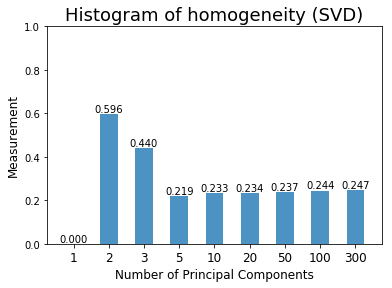

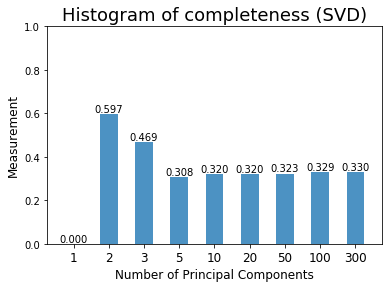

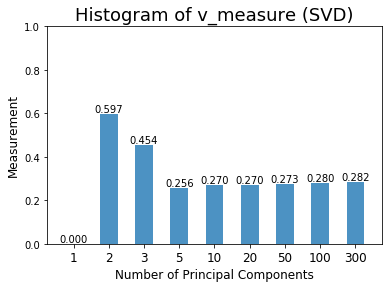

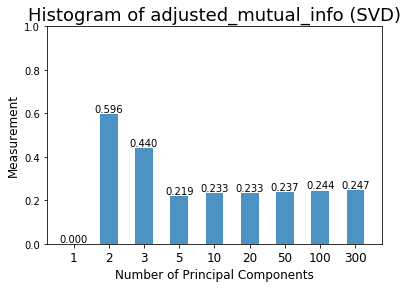

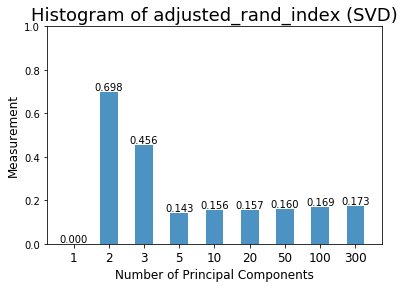

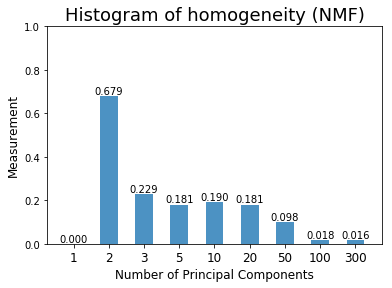

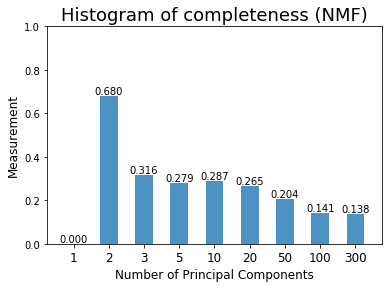

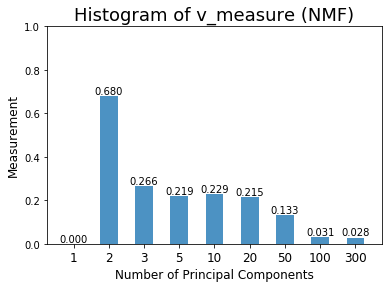

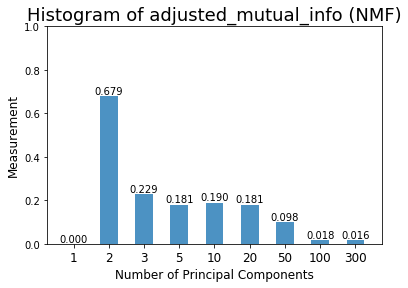

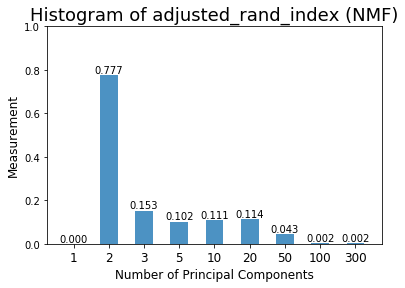

In [24]:
def plot_hist(method, measurement, y_data): # change the input data
    x_labels = ['1', '2', '3', '5', '10', '20', '50', '100', '300']
    height=range(1,10)
    xtickangle=0
    plt.gcf().clear()
    fig, ax = plt.subplots()
    ax.set_xticks([i+0.25 for i in height])
    ax.set_xticklabels(x_labels, fontsize = 12)
    rects = plt.bar([i for i in height], y_data, 0.5, align='edge', alpha = 0.8)
    plt.xlabel('Number of Principal Components', fontsize = 12)
    plt.ylabel('Measurement', fontsize = 12)
    plt.title('Histogram of '+ measurement + ' (' + method + ')', fontsize = 18) 
    plt.axis([0.5,len(x_labels)+1,0,1])
    plt.xticks(rotation=xtickangle)
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height, '%.3f' % float(height), ha='center', va='bottom')
    plt.show()   
    
    
plot_hist('SVD', 'homogeneity',svd_homo)
plot_hist('SVD', 'completeness',svd_comp)
plot_hist('SVD', 'v_measure',svd_v)
plot_hist('SVD', 'adjusted_mutual_info',svd_ami)
plot_hist('SVD', 'adjusted_rand_index',svd_ari)
plot_hist('NMF', 'homogeneity',nmf_homo)
plot_hist('NMF', 'completeness',nmf_comp)
plot_hist('NMF', 'v_measure',nmf_v)
plot_hist('NMF', 'adjusted_mutual_info',nmf_ami)
plot_hist('NMF', 'adjusted_rand_index',nmf_ari)

# Clustering Result Visualization

In [17]:
# Viusalization plot function
def scatter_point_graphing(k_means_object, clustering_result, ground_truth_dataset, title_name = ''):
    plt.gcf().clear()
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.scatter(x=clustering_result[:,0], y=clustering_result[:,1], c=k_means_object.labels_, edgecolors='k', linewidth=0.25, s=30, cmap=plt.get_cmap('tab20'),vmin=0, vmax=20, alpha=0.5)    
    ax1.set_title('Clustering Result')

    ax2.scatter(x=clustering_result[:,0], y=clustering_result[:,1], c=ground_truth_dataset, edgecolors='k', linewidth=0.25, s=30, cmap=plt.get_cmap('tab20'),vmin=0, vmax=20, alpha=0.5)
    ax2.set_title('Ground Truth')
    fig.suptitle(f'{title_name} Visualization')
    plt.show()

In [ ]:
#
svd =  TruncatedSVD(n_components = 2)
best_svd_dataset = svd.fit_transform(dataset_tfidf)
#svd_project= TruncatedSVD(n_components = 2)
#best_svd_project= svd_project.fit_transform(best_svd_dataset)
best_svd_km= KMeans(n_clusters=2,random_state=0,max_iter=2000,n_init=50)
best_svd_km.fit(best_svd_dataset)
scatter_point_graphing(best_svd_km, best_svd_dataset, two_class_target, 'SVD')

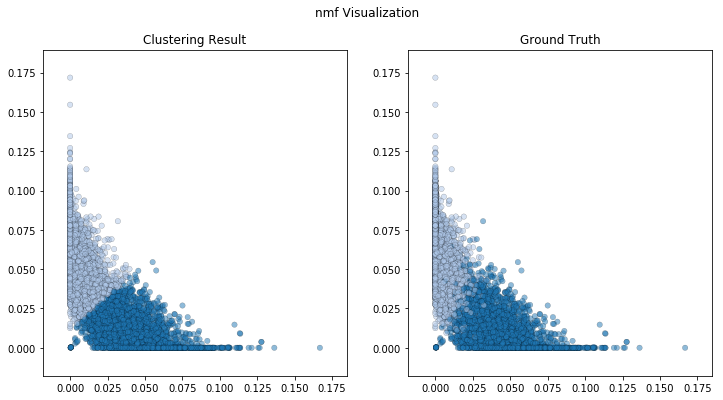

In [25]:
nmf = NMF(n_components= 2)
best_nmf_dataset = nmf.fit_transform(dataset_tfidf)
best_nmf_km= KMeans(n_clusters=2,random_state=0,max_iter=2000,n_init=50)
best_nmf_km.fit(best_nmf_dataset)
scatter_point_graphing(best_nmf_km, best_nmf_dataset, two_class_target, 'nmf')

# Apply combinations of standard scaler and log transformations to improve clustering

## visualize

In [29]:
from sklearn import preprocessing

def nonlinear_transformation(data, C=0.01):
    return np.sign(data) * (np.log(np.abs(data) + C) - np.log(C))

def unit_variance_scale(data):
    return preprocessing.scale(data, with_mean=False, with_std=True)

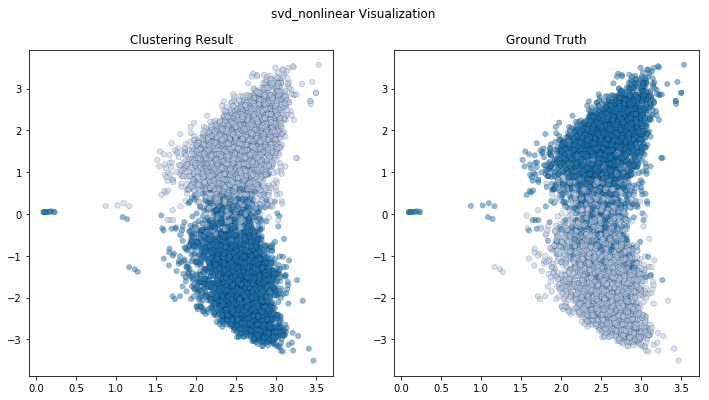

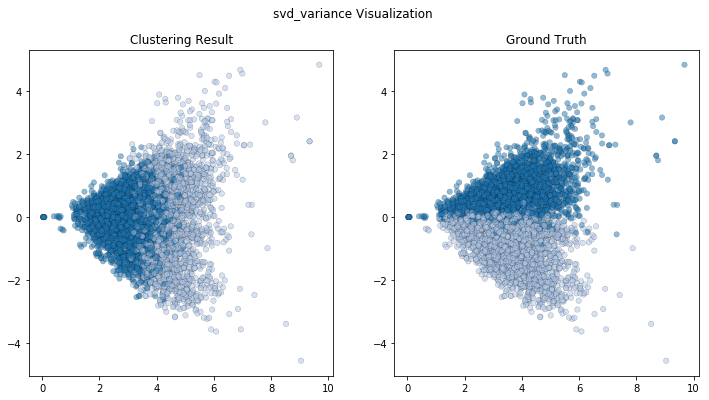

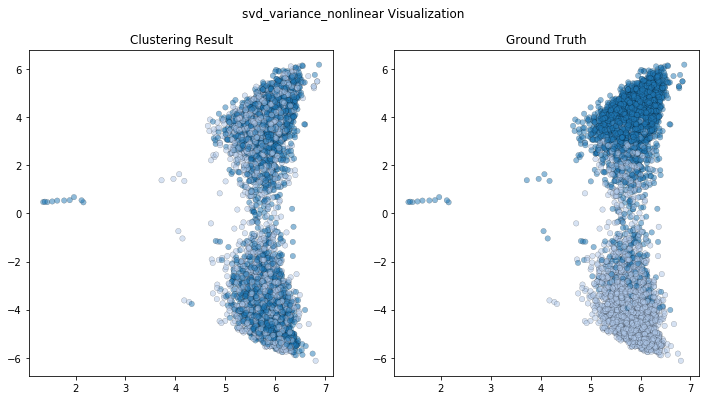

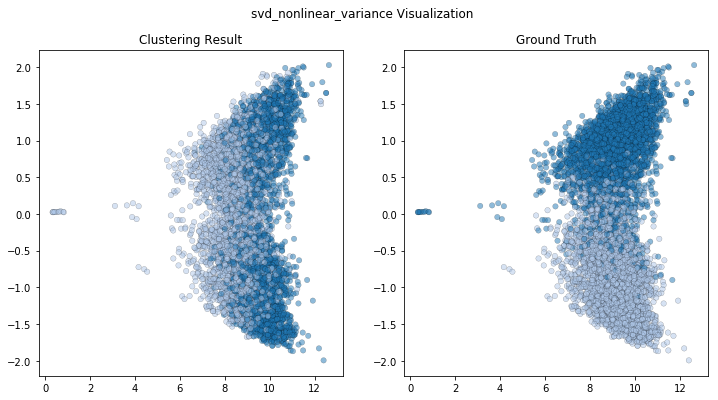

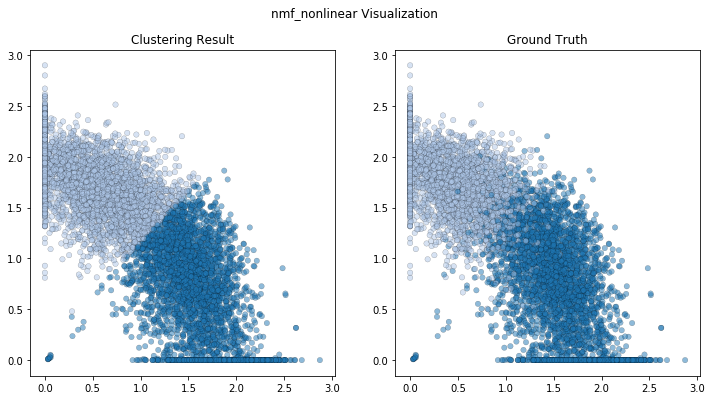

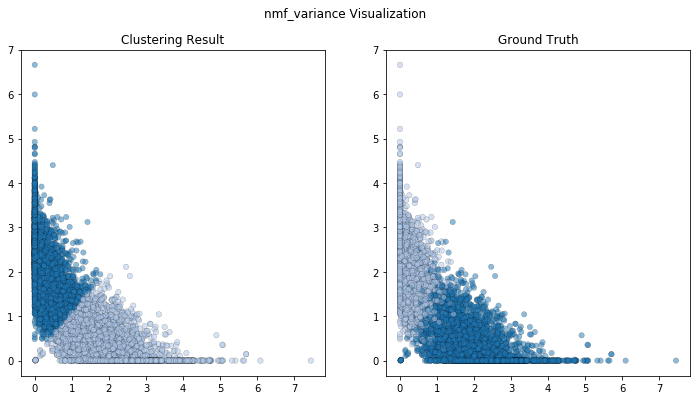

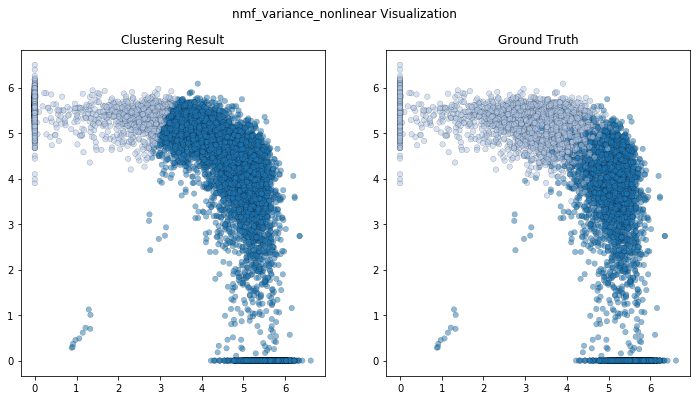

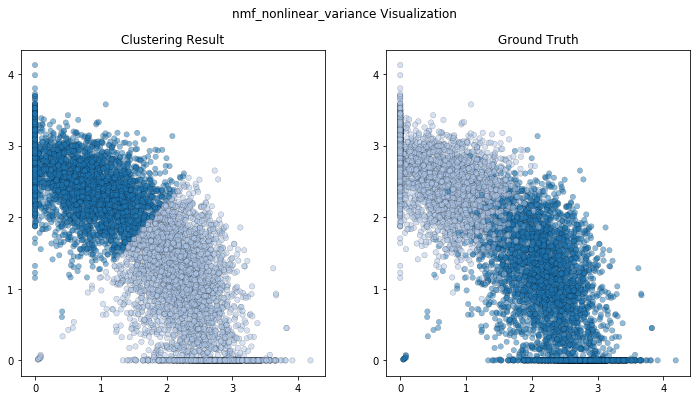

In [36]:
# svd_nonlinear
svd_nonlinear= nonlinear_transformation(best_svd_dataset)
# svd_variance
svd_variance= unit_variance_scale(best_svd_dataset)
# svd_variance_nonlinear
svd_variance_nonlinear=nonlinear_transformation(svd_variance)
# svd_nonlinear_variance
svd_nonlinear_variance=unit_variance_scale(svd_nonlinear)
# nmf_nonlinear
nmf_nonlinear= nonlinear_transformation(best_nmf_dataset)
# nmf_variance
nmf_variance= unit_variance_scale(best_nmf_dataset)
# nmf_variance_nonlinear
nmf_variance_nonlinear=nonlinear_transformation(nmf_variance)
# nmf_nonlinear_variance
nmf_nonlinear_variance=unit_variance_scale(nmf_nonlinear)

transformed_title=['svd_nonlinear','svd_variance','svd_variance_nonlinear','svd_nonlinear_variance',
                  'nmf_nonlinear','nmf_variance','nmf_variance_nonlinear','nmf_nonlinear_variance']

transformed_data =[svd_nonlinear,svd_variance,svd_variance_nonlinear,svd_nonlinear_variance,
                   nmf_nonlinear,nmf_variance,nmf_variance_nonlinear,nmf_nonlinear_variance]

km=KMeans(n_clusters=2,random_state=0,max_iter=2000,n_init=50)
for i in range(len(transformed_title)):
    km.fit(transformed_data[i])
    scatter_point_graphing(km,transformed_data[i],two_class_target,transformed_title[i])

Q9

Q10

## Log transformation alone seems to be very helpful in improving clustering results 

In [37]:
for i in range(len(transformed_title)):
    print('Measure for',transformed_title[i],'is', km_measures(transformed_data[i],two_class_target))
    print('\n')

Measure for svd_nonlinear is {'homogeneity': 0.70680665977303125, 'completeness': 0.70691557854736031, 'v_measure': 0.70686111496442838, 'adjusted_rand_index': 0.80409395508854298, 'adjusted_mutual_info': 0.70677981783905952}


Measure for svd_variance is {'homogeneity': 0.00040074716876295469, 'completeness': 0.00042893785378286288, 'v_measure': 0.00041436358571664576, 'adjusted_rand_index': 0.0005200869330264416, 'adjusted_mutual_info': 0.0003092312858432824}


Measure for svd_variance_nonlinear is {'homogeneity': 0.0024802277051129058, 'completeness': 0.0025344409530109399, 'v_measure': 0.0025070412811610521, 'adjusted_rand_index': 0.0030191531856917256, 'adjusted_mutual_info': 0.0023889037850059734}


Measure for svd_nonlinear_variance is {'homogeneity': 0.00063520749876287295, 'completeness': 0.00063542016709545047, 'v_measure': 0.00063531381513172946, 'adjusted_rand_index': 0.00073960645797650781, 'adjusted_mutual_info': 0.00054371536098228959}


Measure for nmf_nonlinear is {'ho

Q11

In [ ]:
import time
dataset_twenty = fetch_20newsgroups(subset='all',shuffle=True, random_state=42)
dataset_twenty_tfidf= vectorizer.fit_transform(dataset.data)
km=KMeans(n_clusters=20,random_state=0,max_iter=2000,n_init=50)
km.fit(dataset_twenty_tfidf)
print(dataset_twenty.target.shape)
print(km.labels_.shape)

In [ ]:
start = time.time()
km.fit(dataset_twenty_tfidf)
#print(km_measures(dataset_twenty_tfidf,dataset_twenty.target,20))
print('finished within %f seconds',time.time()-start)
contin_matrix = metrics.cluster.contingency_matrix(dataset_twenty.target, km.labels_)  #row is true, cloumn is predicted
print(contin_matrix)
plot_contingency_matrix(contin_matrix)